<a href="https://colab.research.google.com/github/27priyanshu/Machine-Learning-Models/blob/main/GLCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def compute_glcm(image, distance):
    """
    Compute the GLCM of the input image for all four angles.

    Parameters:
    image (numpy.ndarray): The input image as a numpy array.
    distance (int): The distance between the pixels.

    Returns:
    list of numpy.ndarray: The GLCMs as a list of numpy arrays.
    """
    # Define the four angles
    angles = [0, 45, 90, 135]

    # Compute the GLCM for each angle
    glcms = []
    for angle in angles:
        if angle == 0:
            offset = (distance, 0)
        elif angle == 45:
            offset = (distance, distance)
        elif angle == 90:
            offset = (0, distance)
        elif angle == 135:
            offset = (-distance, distance)
        else:
            raise ValueError("Invalid angle.")

        # Compute the GLCM
        glcm = np.zeros((256, 256))
        height, width = image.shape[:2]
        for i in range(height):
            for j in range(width):
                if i + offset[0] < height and j + offset[1] < width:
                    glcm[image[i, j], image[i + offset[0], j + offset[1]]] += 1

        glcms.append(glcm)

    return glcms

# Load the input image
image = cv2.imread("/content/imagess.jpg", cv2.IMREAD_GRAYSCALE)

# Compute the GLCMs
glcms = compute_glcm(image, distance=1)

# Print the GLCMs
total_glcm=[]
for i, glcm in enumerate(glcms):
    print(f"GLCM at angle {i * 45}°:")
    total_glcm.append(glcm)
    print(glcm)

GLCM at angle 0°:
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 22.  8. 28.]
 [ 0.  0.  0. ... 16.  9. 19.]
 [ 0.  0.  0. ... 24. 23. 37.]]
GLCM at angle 45°:
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  15.   8.  27.]
 [  0.   0.   0. ...  12.   5.  28.]
 [  0.   0.   0. ...  25.  28. 113.]]
GLCM at angle 90°:
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  9. 10. 16.]
 [ 0.  0.  0. ...  7.  8. 12.]
 [ 0.  0.  0. ... 13. 11. 42.]]
GLCM at angle 135°:
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 20.  9. 21.]
 [ 0.  0.  0. ...  6.  5. 14.]
 [ 0.  0.  0. ... 21. 20. 56.]]


In [15]:
type(total_glcm)

list

In [16]:
vector = np.array(total_glcm)
print(type(vector))

<class 'numpy.ndarray'>


In [17]:
flatten_vector = vector.flatten()
print(flatten_vector)

[ 0.  0.  0. ... 21. 20. 56.]


<ipython-input-19-20eeadf375d7>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 1, i+1)


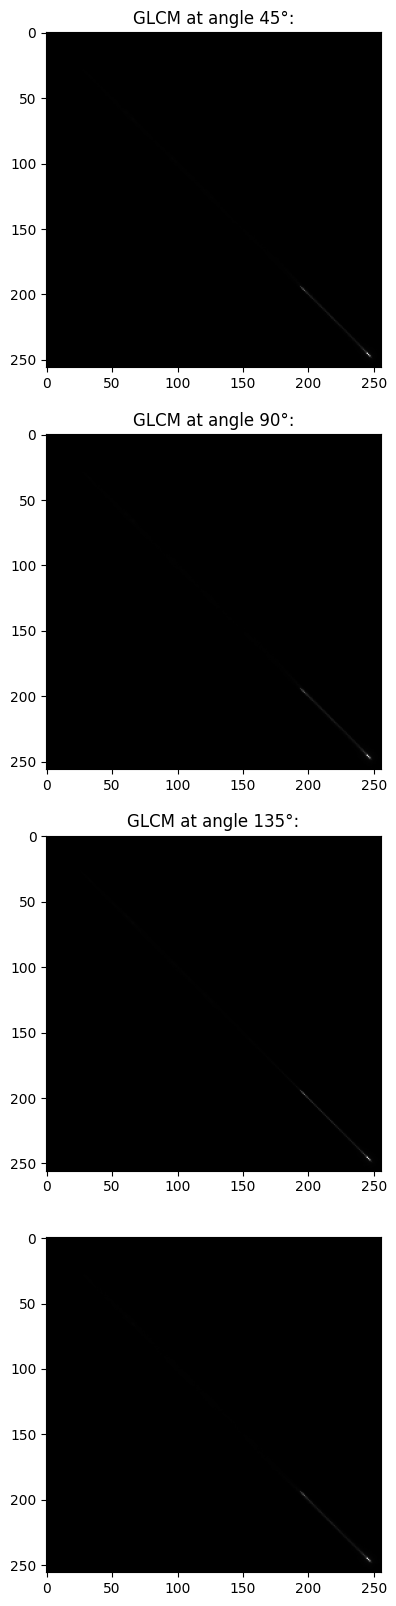

In [19]:

plt.figure(figsize=(20,20))


total_glcm=[]
for i, glcm in enumerate(glcms):
    # print(f"GLCM at angle {i * 45}°:")
    total_glcm.append(glcm)
    # print(glcm)
    plt.title(f"GLCM at angle {i * 45}°:")
    plt.subplot(4, 1, i+1)
    plt.imshow(glcm, cmap="gray")